**Getting access to libraries**

In [1]:
#Getting access to libraries

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Screentime - App Details Updated.csv")

In [5]:
df.describe()

,Unnamed: 5
count,223.0
mean,2.0
std,0.0
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0


**Cleaning Dataset**

In [6]:
# Check for missing values
df.isnull().sum()

# Filling missing values with mean or dropping rows with NaNs

# Select numeric columns only
numeric_df = df.select_dtypes(include=np.number)

# Calculate the mean of numeric columns
df[numeric_df.columns] = numeric_df.fillna(numeric_df.mean())

# or
df.dropna(inplace=True)  # Drop rows with missing values

df.head()

,Date,Usage,Notifications,Times opened,App,Unnamed: 5
0,08/26/2022,38,70,49,Instagram,2.0
1,08/27/2022,39,43,48,Instagram,2.0
2,08/28/2022,64,231,55,Instagram,2.0
3,08/29/2022,14,35,23,Instagram,2.0
4,08/30/2022,3,19,5,Instagram,2.0


**Checking for Null Values**

In [7]:
df.isnull().sum()

,0
Date,0
Usage,0
Notifications,0
Times opened,0
App,0
Unnamed: 5,0


**Descriptive statistics of the data**

In [8]:
# Descriptive statistics of the dataset
descriptive_stats = df.describe()

# Display descriptive statistics
print(descriptive_stats)


       Unnamed: 5
count       223.0
mean          2.0
std           0.0
min           2.0
25%           2.0
50%           2.0
75%           2.0
max           2.0


**Displaying the info of dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 223
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           223 non-null    object 
 1   Usage          223 non-null    object 
 2   Notifications  223 non-null    object 
 3   Times opened   223 non-null    object 
 4   App            223 non-null    object 
 5   Unnamed: 5     223 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.2+ KB


**Amount of usage of the apps**

In [10]:
figure = px.bar(data_frame=df,
                x = "Date",
                y = "Usage",
                color="App",
                title="Usage")
figure.show()

**Number of notifications from the apps**

In [11]:
figure = px.bar(data_frame=df,
                x = "Date",
                y = "Notifications",
                color="App",
                title="Notifications")
figure.show()

**Number of times the apps opened**

In [ ]:
figure = px.bar(data_frame=df,
                x = "Date",
                y = "Times opened",
                color="App",
                title="Times Opened")
figure.show()

**Relationship Between Notifications & Usage:**
Let’s have a look at the relationship between the number of notifications and the amount of usage:


In [12]:
# Convert the "Notifications" and "Usage" columns to numeric, forcing errors to NaN
df["Notifications"] = pd.to_numeric(df["Notifications"], errors='coerce')
df["Usage"] = pd.to_numeric(df["Usage"], errors='coerce')

# Drop rows with NaN values resulting from the conversion
df = df.dropna(subset=["Notifications", "Usage"])

# Create the scatter plot with a trendline
figure = px.scatter(data_frame=df,
                    x="Notifications",
                    y="Usage",
                    size="Notifications",
                    trendline="ols",
                    title="Relationship Between Number of Notifications and Usage")

# Show the plot
figure.show()

pieChart

In [ ]:
figure = px.pie(data_frame=df,
                names="App",  # Column for categories (e.g., apps)
                values="Times opened",  # Column for values (e.g., the number of times opened)
                title="Distribution of Times Opened by App",  # Title of the pie chart
                hole=0.3)
figure.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 223
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           221 non-null    object 
 1   Usage          221 non-null    float64
 2   Notifications  221 non-null    float64
 3   Times opened   221 non-null    object 
 4   App            221 non-null    object 
 5   Unnamed: 5     221 non-null    float64
dtypes: float64(3), object(3)
memory usage: 12.1+ KB


**Array Manipulation**

In [13]:
# Extract the 'Usage', 'Notifications', and 'Times opened' columns as NumPy arrays
usage_times = df['Usage'].astype(float).values  # Converts 'Usage' column to a NumPy array of floats
notifications = df['Notifications'].values  # Converts 'Notifications' to NumPy array
times_opened = df['Times opened'].astype(int).values  # Converts 'Times opened' to NumPy array of ints

# 1. Total usage time
total_usage = np.sum(usage_times)
print("Total Usage Time:", total_usage)

# 2. Average number of notifications
avg_notifications = np.mean(notifications)
print("Average Notifications:", avg_notifications)

# 3. Max and Min usage times
max_usage = np.max(usage_times)
min_usage = np.min(usage_times)
print("Max Usage:", max_usage, "Min Usage:", min_usage)

# 4. Filter usage times greater than 60 minutes
usage_above_60 = usage_times[usage_times > 60]
print("Usage Above 60 Minutes:", usage_above_60)

# 5. Sort the 'times_opened' array in ascending order
sorted_times_opened = np.sort(times_opened)
print("Sorted Times Opened:", sorted_times_opened)

# 6. Reshape the usage times array into a 2D array
# Calculate the number of rows needed for reshaping
num_rows = len(usage_times) // 2  # Use integer division (//)

# Reshape with calculated rows and 2 columns. If the number of elements in
# usage_times is odd, the last element won't be included in the reshaped array.
reshaped_usage = usage_times[:num_rows * 2].reshape(num_rows, 2)
print("Reshaped Usage Array:\n", reshaped_usage)

# 7. Correlation between 'Usage' and 'Times Opened'
correlation = np.corrcoef(usage_times, times_opened)[0, 1]
print("Correlation between Usage and Times Opened:", correlation)

Total Usage Time: 19504.0
Average Notifications: 162.34389140271495
Max Usage: 244.0 Min Usage: 1.0
Usage Above 60 Minutes: [ 64.  72.  71.  94. 114.  82.  69. 130. 128. 108.  76. 126.  91. 160.
  69. 119. 103. 203. 182.  71.  64.  71. 212. 244.  77.  89.  72.  85.
  78. 120.  95. 110.  90.  85.  95. 100. 102. 108.  90.  85.  92. 105.
 110.  88.  95. 100. 102.  98.  97. 101.  90.  87.  94.  99. 105. 110.
  95.  92. 100.  97. 103. 108. 115. 110.  98. 105.  97. 100. 115. 110.
 107.  98. 101.  95. 103. 106. 108. 102.  98. 105. 100.  96. 103. 110.
 108. 100. 105.  98. 110. 115. 108. 100.  98. 105. 100.  97. 103. 110.
 105. 100.  95.  98. 100. 102. 110. 108. 100. 105.  97. 100. 115. 110.
 108. 100.  95.  98. 103. 110. 115. 110. 105.  97. 100. 115. 110. 107.
  98. 101.  95. 103. 106. 108. 102.  98. 105. 100.  96. 103. 110. 108.
 100. 105.  98. 110. 115. 108. 100.  98. 105. 100.  97. 103. 110. 105.
 100.  95.  98. 100. 102. 110. 108. 100. 105.  97. 100. 115. 110. 108.
 100.  95.  98. 103. 110

**Logistic Regression**

Best C (Regularization) value: {'C': 10}
Accuracy: 0.9615384615384616
Confusion Matrix:
 [[12  0]
 [ 1 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

Cross-Validation Accuracy: 0.8486153846153845


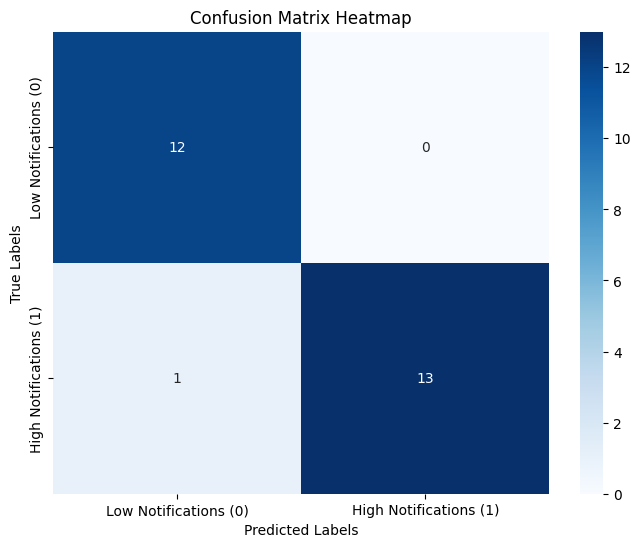

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load and clean data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Screentime - App Details Updated.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Notifications'] = pd.to_numeric(df['Notifications'], errors='coerce')
df = df.dropna(subset=['Date', 'Notifications'])

# Convert Date to ordinal and create binary classification for Notifications
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)
threshold = df['Notifications'].median()
df['High_Notifications'] = (df['Notifications'] > threshold).astype(int)

# Feature Engineering: Extract day of the week and month
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

# Add moderate noise to make predictions more challenging
df['Random_Noise'] = np.random.normal(0, 3, df.shape[0])

# Prepare data (with 'Notifications' transformed slightly)
X = df[['Date_ordinal', 'Day_of_Week', 'Month', 'Notifications', 'Random_Noise']]

# Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df['High_Notifications']

# Split data into training and testing sets (try 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Logistic Regression with hyperparameter tuning for regularization
param_grid = {'C': [0.01, 0.1, 1, 10]}
log_model = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Best C (Regularization) value: {log_model.best_params_}')
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Cross-validation to check generalization
cv_scores = cross_val_score(log_model, X_scaled, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")

# Plotting the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Notifications (0)', 'High Notifications (1)'],
            yticklabels=['Low Notifications (0)', 'High Notifications (1)'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()